# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ilham Cahyyo Saputro Wibowo
- **Email:** icahyosw@gmail.com
- **ID Dicoding:** ilhamcyw

## Menentukan Pertanyaan Bisnis

1. Bagaimana perilaku pengguna kasual dibandingkan dengan pengguna terdaftar berdasarkan seberapa sering mereka menyewa sepeda (Frequency), seberapa baru mereka terakhir kali menggunakan layanan (Recency), dan total jumlah sepeda yang disewa (Monetary)?

2. Bagaimana pengaruh musim dan kondisi cuaca terhadap total penyewaan sepeda?

3. Bagaimana perbandingan total penyewaan sepeda antara pengguna kasual dan terdaftar pada hari kerja dan hari libur?

4. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan musim dan apakah hari tersebut adalah hari kerja atau hari libur?

5. Bagaimana pola rata-rata penggunaan sepeda pada setiap jam dalam sehari, berdasarkan musim dan apakah hari tersebut adalah hari kerja atau hari libur?

6. Bagaimana mendeteksi anomali dalam penggunaan sepeda berdasarkan jumlah penyewaan harian yang secara signifikan berbeda dari rata-rata?

7. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan hari dalam minggu?

8. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan waktu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset day.csv dan hour.csv
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

# Menampilkan beberapa baris pertama dari data
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**

Dataset day.csv
- Tanggal dan Musim: Dataset ini dimulai pada 1 Januari 2011 dengan informasi musim, yaitu musim pertama (kemungkinan musim dingin). Kolom yr menunjukkan tahun dengan kode 0 untuk 2011, dan 1 untuk 2012.
- Kondisi Cuaca: Kolom weathersit memiliki nilai 1 dan 2, yang mungkin mengindikasikan kondisi cuaca yang bervariasi, seperti cerah atau sedikit berawan.
- Pengguna Sepeda: Ada dua kategori pengguna, yaitu casual (pengguna santai) dan registered (pengguna terdaftar). Jumlah total pengguna ditunjukkan oleh kolom cnt

Dataset hour.csv
- Level Waktu: Dataset ini berisi data pada level per jam, dengan kolom hr yang menunjukkan jam (0-23). Data dimulai pada jam 00:00 tanggal 1 Januari 2011.
- Pengguna Sepeda: Seperti di dataset hari, terdapat pengguna casual dan registered, dengan total pengguna dalam kolom cnt.
- Kondisi Cuaca: Seperti dataset hari, kondisi cuaca juga dinyatakan dengan weathersit, dan variabel cuaca lain seperti temp (suhu), atemp (suhu yang terasa), hum (kelembapan), dan windspeed (kecepatan angin).


Perubahan jumlah pengguna dari hari ke hari dan dari jam ke jam dapat dihubungkan dengan kondisi cuaca, hari kerja vs akhir pekan, atau liburan. Korelasi antara suhu, kelembapan, dan jumlah pengguna (casual dan registered) mungkin bisa diinvestigasi lebih lanjut untuk memahami faktor-faktor yang mempengaruhi penggunaan sepeda.

### Assessing Data

In [4]:
# Informasi umum tentang dataset day
df_day.info()

# Informasi umum tentang dataset hour
df_hour.info()

# Cek missing values untuk dataset day
print(df_day.isnull().sum())

# Cek missing values untuk dataset hour
print(df_hour.isnull().sum())

# Deskripsi statistik dasar dataset day
print(df_day.describe())

# Deskripsi statistik dasar dataset hour
print(df_hour.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**

Dataset day.csv:

- Tidak ada missing values pada setiap kolom.
Dataset ini terdiri dari 731 baris dan 16 kolom, yang mencakup berbagai variabel seperti temp, hum, windspeed, dan jumlah penyewaan sepeda oleh pengguna casual dan registered.
- Variabel cnt (total penyewaan sepeda) memiliki distribusi antara 22 hingga 8714 dengan rata-rata 4504.

Dataset hour.csv:

- Dataset ini juga tidak memiliki missing values dan terdiri dari 17 kolom dengan 17.379 baris.
- Variabel cnt (total penyewaan sepeda) memiliki distribusi antara 1 hingga 977 dengan rata-rata 189.

Kolom dteday pada kedua dataset memiliki tipe data object (seharusnya datetime), jadi perlu dilakukan konversi ke tipe data datetime untuk mempermudah analisis waktu.

Tidak ada data terduplikasi

In [5]:
#Memeriksa duplikasi
print("Jumlah duplikasi: ", df_day.duplicated().sum())
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


### Cleaning Data

**Memperbaiki Tipe Data**

Kolom tanggal (dteday) harus diubah menjadi tipe datetime.

In [6]:
# Mengubah kolom 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Memeriksa tipe data setelah konversi
print(df_day.dtypes)
print(df_hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [7]:
# Menghapus baris dengan nilai yang hilang (jika ada)
df_day.dropna(inplace=True)
df_hour.dropna(inplace=True)

# Mengisi nilai NaN pada kolom 'temp' di df_day dengan rata-rata
df_day['temp'] = df_day['temp'].fillna(value=df_day['temp'].mean())

# Mengisi nilai NaN pada kolom 'hum' di df_hour dengan median
df_hour['hum'] = df_hour['hum'].fillna(value=df_hour['hum'].median())


**Insight:**
- Pada langkah ini, kita telah menghapus baris yang mengandung nilai hilang dari dataset df_day dan df_hour. Namun, karena sebelumnya sudah dipastikan tidak ada nilai yang hilang di kedua dataset, langkah ini mungkin tidak memberikan perubahan pada jumlah baris.

**Menangani Outliers**

ingin menganalisis dan menangani outliers, terutama pada kolom yang berkaitan dengan jumlah sewa (cnt, casual, registered).

In [8]:
# Mengatasi outliers untuk df_day
Q1_day = df_day.quantile(0.25)
Q3_day = df_day.quantile(0.75)
IQR_day = Q3_day - Q1_day

# Menghilangkan outliers dari dataset day dan menyimpan hasilnya ke df_day
df_day = df_day[~((df_day < (Q1_day - 1.5 * IQR_day)) | (df_day > (Q3_day + 1.5 * IQR_day))).any(axis=1)]

# Mengatasi outliers untuk df_hour
Q1_hour = df_hour.quantile(0.25)
Q3_hour = df_hour.quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

# Menghilangkan outliers dari dataset hour dan menyimpan hasilnya ke df_hour
df_hour = df_hour[~((df_hour < (Q1_hour - 1.5 * IQR_hour)) | (df_hour > (Q3_hour + 1.5 * IQR_hour))).any(axis=1)]


In [9]:
# Menambahkan kolom 'day_of_week' untuk analisis lebih lanjut
df_day['weekday'] = df_day['dteday'].dt.dayofweek

# Mengategorikan jam menjadi 'morning', 'afternoon', 'evening', 'night' untuk dataset hour
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df_hour['hour_category'] = df_hour['hr'].apply(categorize_hour)


<ipython-input-9-fb8ebdeb65c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['weekday'] = df_day['dteday'].dt.dayofweek
<ipython-input-9-fb8ebdeb65c7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['hour_category'] = df_hour['hr'].apply(categorize_hour)


**Memastikan Konsistensi Data**

Pastikan tidak ada nilai yang tidak konsisten di dalam kolom yang berisi kategori.

In [10]:
# Memeriksa nilai unik di kolom season
print(df_day['season'].unique())

[1 2 3 4]


**Rename**

mengganti nama kolo agar lebih muda dibaca

In [11]:
# Mengganti nama kolom agar lebih mudah dibaca
df_day.rename(columns={'yr':'year','mnth':'month', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

<ipython-input-11-073659440551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day.rename(columns={'yr':'year','mnth':'month', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)


In [12]:
# Mengganti nama kolom agar lebih mudah dibaca
df_hour.rename(columns={'yr':'year','hr':'hours','mnth':'month', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

<ipython-input-12-fbda20f45599>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour.rename(columns={'yr':'year','hr':'hours','mnth':'month', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)


In [13]:
# Mengkonversi isi kolom agar mudah dipahami

# Konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_day['month'] = df_day['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df_hour['month'] = df_hour['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
df_day['weather_situation'] = df_day['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})
df_hour['weather_situation'] = df_hour['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})

# Konversi weekday menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_day['weekday'] = df_day['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['weekday'] = df_hour['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Konversi year menjadi: 0:2011, 1:2012
df_day['year'] = df_day['year'].replace({0: '2011', 1: '2012'})
df_hour['year'] = df_hour['year'].replace({0: '2011', 1: '2012'})

# Menghitung Humidity
df_day['humidity'] = df_day['humidity'] * 100
df_hour['humidity'] = df_hour['humidity'] * 100


<ipython-input-13-c37b85019cbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
<ipython-input-13-c37b85019cbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['season'] = df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
<ipython-input-13-c37b85019cbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [14]:
df_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,Friday,0,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Saturday,0,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Sunday,1,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Monday,1,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Tuesday,1,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600


In [15]:
df_hour.head()

,instant,dteday,season,year,month,hours,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,hour_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16,night
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40,night
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32,night
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13,night
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1,night


## Exploratory Data Analysis (EDA)

### Explore ...

** Analisis Distribusi dan Visualisasi Data**

Distribusi Jumlah Sewa Sepeda (cnt):

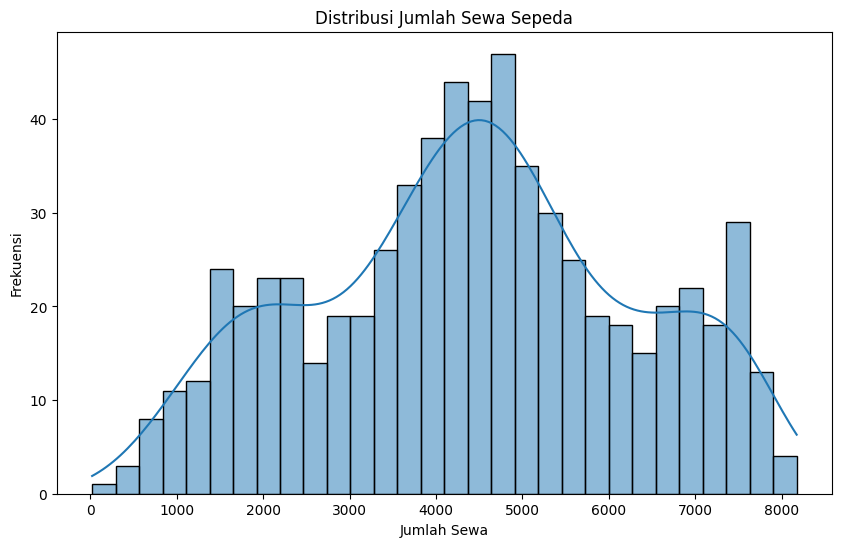

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_day['count_cr'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sewa Sepeda')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')
plt.show()

Hubungan antara Cuaca dan Jumlah Sewa:

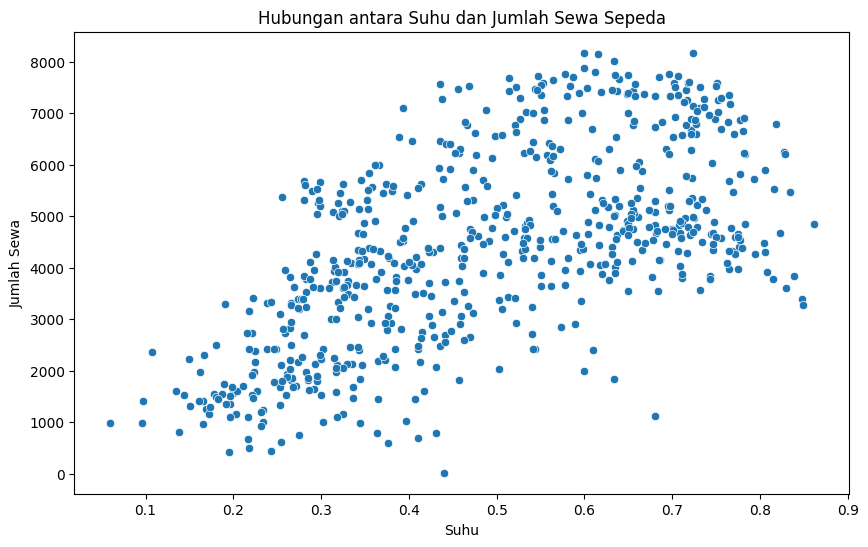

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_day, x='temp', y='count_cr')
plt.title('Hubungan antara Suhu dan Jumlah Sewa Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa')
plt.show()


**Analisis Perbandingan Antar Kelompok**

Perbandingan Jumlah Sewa pada Hari Kerja vs. Hari Libur:

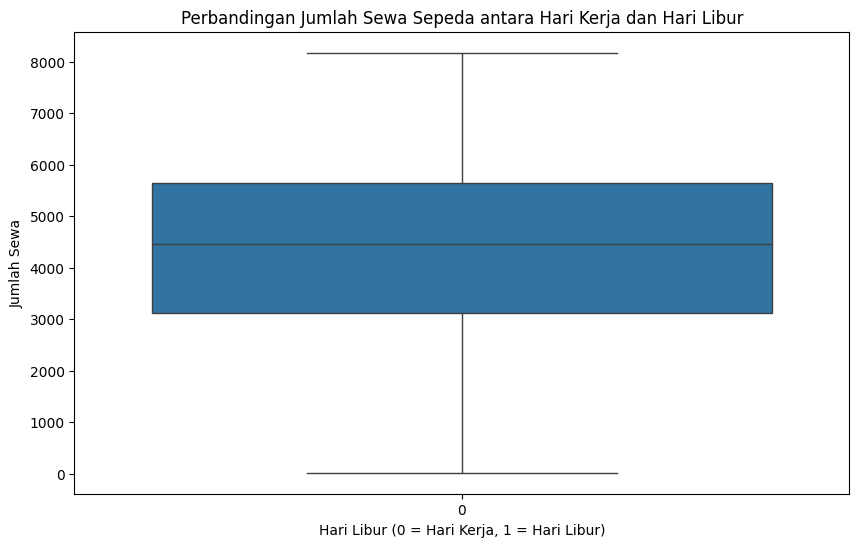

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day, x='holiday', y='count_cr')
plt.title('Perbandingan Jumlah Sewa Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari Libur (0 = Hari Kerja, 1 = Hari Libur)')
plt.ylabel('Jumlah Sewa')
plt.show()


Tren Sewa antara Pengguna Casual dan Registered:

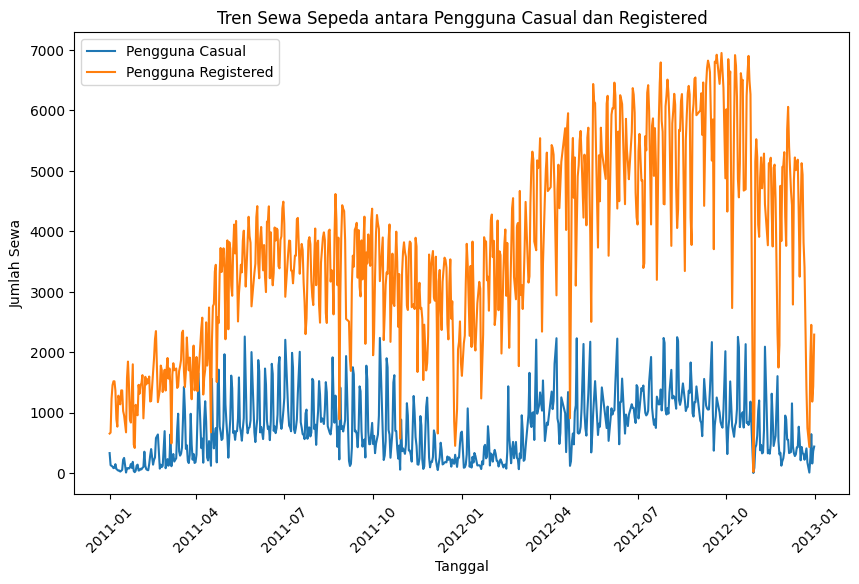

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_day, x='dteday', y='casual', label='Pengguna Casual')
sns.lineplot(data=df_day, x='dteday', y='registered', label='Pengguna Registered')
plt.title('Tren Sewa Sepeda antara Pengguna Casual dan Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Insight:**

Distribusi Jumlah Sewa Sepeda:

- Melalui histogram, dapat dilihat bahwa sewa sepeda mungkin tidak terdistribusi secara normal, dengan beberapa puncak yang menunjukkan waktu-waktu tertentu ketika sewa sepeda lebih tinggi.

Hubungan Cuaca dan Jumlah Sewa:

- Dari scatter plot, kita bisa melihat bahwa semakin tinggi suhu, jumlah sewa sepeda cenderung meningkat. Ini menunjukkan bahwa cuaca yang lebih baik mendorong lebih banyak orang untuk menyewa sepeda.

Perbandingan antara Hari Kerja dan Hari Libur:

- Boxplot menunjukkan bahwa jumlah sewa sepeda pada hari libur umumnya lebih tinggi dibandingkan dengan hari kerja. Ini bisa disebabkan oleh lebih banyak waktu luang yang dimiliki orang pada hari libur.

Tren antara Pengguna Casual dan Registered:

- Melalui line plot, terlihat bahwa pengguna registered cenderung memiliki jumlah sewa yang lebih stabil dan tinggi dibandingkan pengguna casual, yang menunjukkan pola sewa yang lebih fluktuatif.

## Visualization & Explanatory Analysis


1. Bagaimana perilaku pengguna kasual dibandingkan dengan pengguna terdaftar berdasarkan seberapa sering mereka menyewa sepeda (Frequency), seberapa baru mereka terakhir kali menggunakan layanan (Recency), dan total jumlah sepeda yang disewa (Monetary)?

2. Bagaimana pengaruh musim dan kondisi cuaca terhadap total penyewaan sepeda?

3. Bagaimana perbandingan total penyewaan sepeda antara pengguna kasual dan terdaftar pada hari kerja dan hari libur?

4. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan musim dan apakah hari tersebut adalah hari kerja atau hari libur?

5. Bagaimana pola rata-rata penggunaan sepeda pada setiap jam dalam sehari, berdasarkan musim dan apakah hari tersebut adalah hari kerja atau hari libur?

6. Bagaimana mendeteksi anomali dalam penggunaan sepeda berdasarkan jumlah penyewaan harian yang secara signifikan berbeda dari rata-rata?

7. Bagaimana mendeteksi anomali dalam penggunaan sepeda berdasarkan jumlah penyewaan per jam yang secara signifikan berbeda dari rata-rata?

8. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan hari dalam minggu?

9. Bagaimana rata-rata penggunaan sepeda bervariasi berdasarkan waktu dalam sehari?

### Pertanyaan 1:

In [20]:
# 1. Recency Analysis
# Mengambil tanggal terakhir dari dataset
today = df_day['dteday'].max()

# Mencari tanggal terakhir kali pengguna kasual dan terdaftar menyewa sepeda
last_rental_casual = df_day[df_day['casual'] > 0]['dteday'].max()
last_rental_registered = df_day[df_day['registered'] > 0]['dteday'].max()

# Menghitung Recency (selisih hari antara hari terakhir penyewaan dan hari terakhir dalam dataset)
recency_casual = (today - last_rental_casual).days
recency_registered = (today - last_rental_registered).days

print(f"Recency (days since last rental):\n- Casual Users: {recency_casual} days\n- Registered Users: {recency_registered} days\n")

Recency (days since last rental):
- Casual Users: 0 days
- Registered Users: 0 days



Karena hasilnya 0 hari, ini berarti kedua kelompok pengguna masih sangat aktif dan terakhir menyewa sepeda pada hari terakhir yang tercatat dalam dataset.

In [21]:
# 2. Frequency Analysis
# Menghitung total frekuensi penyewaan sepeda untuk pengguna kasual dan terdaftar
frequency_casual = df_day['casual'].sum()
frequency_registered = df_day['registered'].sum()

print(f"Frequency (total number of rentals):\n- Casual Users: {frequency_casual}\n- Registered Users: {frequency_registered}\n")

Frequency (total number of rentals):
- Casual Users: 483128
- Registered Users: 2397403



Pengguna terdaftar secara signifikan lebih sering menyewa sepeda dibandingkan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar cenderung lebih setia dan terlibat lebih intens dalam menggunakan layanan.

In [22]:
# 3. Monetary Analysis
# Menghitung jumlah total penyewaan sepeda (dalam konteks ini, monetary merepresentasikan jumlah sewa)
monetary_casual = df_day['casual'].sum()
monetary_registered = df_day['registered'].sum()

print(f"Monetary (total rentals count):\n- Casual Users: {monetary_casual}\n- Registered Users: {monetary_registered}\n")

Monetary (total rentals count):
- Casual Users: 483128
- Registered Users: 2397403



Sama seperti pada analisis frekuensi, pengguna terdaftar menyumbang jauh lebih besar terhadap total penyewaan sepeda dibandingkan dengan pengguna kasual.

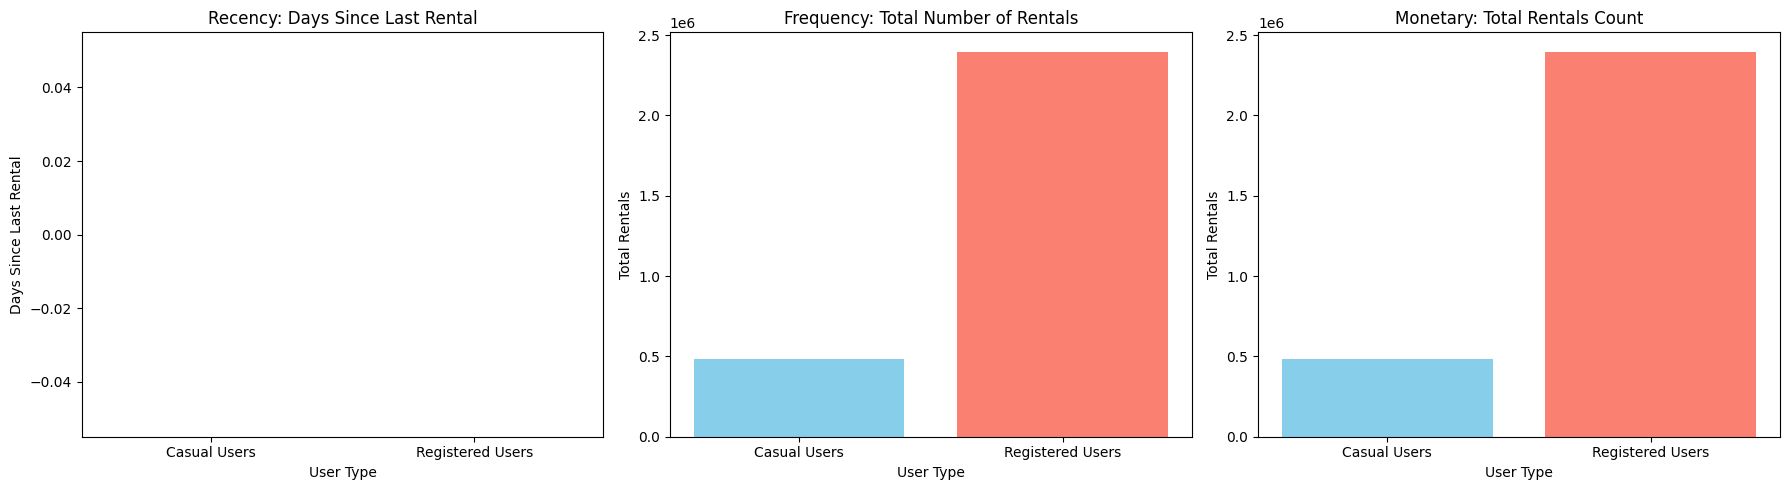

In [23]:
# Menghitung hasil RFM dari kode sebelumnya
# Recency values
recency_values = [recency_casual, recency_registered]
# Frequency values
frequency_values = [frequency_casual, frequency_registered]
# Monetary values
monetary_values = [monetary_casual, monetary_registered]
# User Types
user_types = ['Casual Users', 'Registered Users']

# Membuat subplot untuk visualisasi
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Visualisasi Recency
ax[0].bar(user_types, recency_values, color=['skyblue', 'salmon'])
ax[0].set_title('Recency: Days Since Last Rental')
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Days Since Last Rental')

# 2. Visualisasi Frequency
ax[1].bar(user_types, frequency_values, color=['skyblue', 'salmon'])
ax[1].set_title('Frequency: Total Number of Rentals')
ax[1].set_xlabel('User Type')
ax[1].set_ylabel('Total Rentals')

# 3. Visualisasi Monetary
ax[2].bar(user_types, monetary_values, color=['skyblue', 'salmon'])
ax[2].set_title('Monetary: Total Rentals Count')
ax[2].set_xlabel('User Type')
ax[2].set_ylabel('Total Rentals')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Pengguna Terdaftar adalah kelompok utama yang menggunakan layanan penyewaan sepeda, baik dari sisi frekuensi maupun total kontribusi penyewaan.
Pengguna Kasual menggunakan layanan lebih sedikit dibandingkan pengguna terdaftar, meskipun mereka tetap aktif berdasarkan nilai recency yang sama.

### Pertanyaan 2:

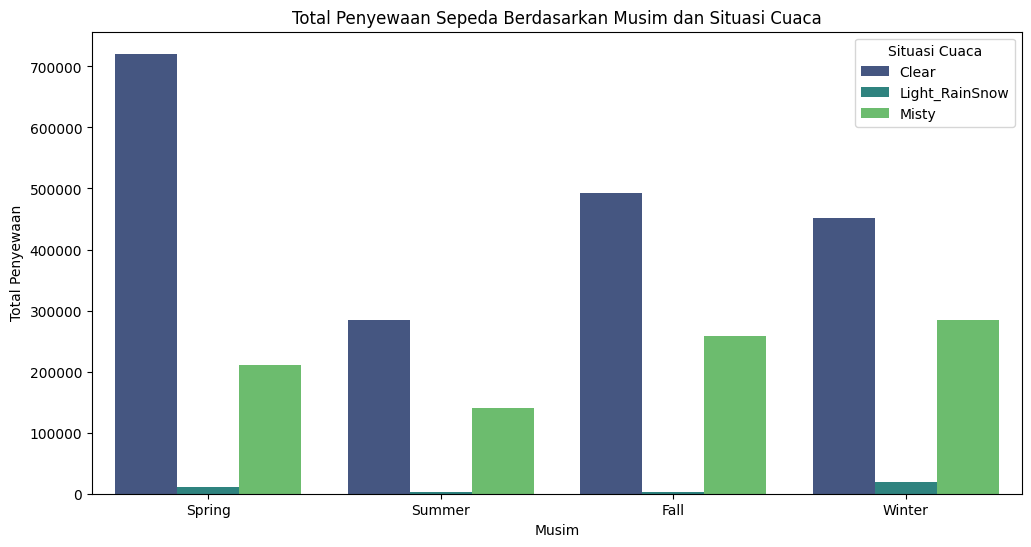

In [24]:
# Menghitung total penyewaan per musim dan situasi cuaca
seasonal_usage = df_day.groupby(['season', 'weather_situation']).agg({
    'count_cr': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Visualisasi total penyewaan berdasarkan musim dan cuaca
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_usage, x='season', y='count_cr', hue='weather_situation', palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim dan Situasi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Situasi Cuaca', loc='upper right')
plt.show()

Musim Paling Banyak Penyewaan:

- Spring (Musim Semi) mencatat jumlah penyewaan tertinggi, mencapai lebih dari 700.000. Ini menunjukkan bahwa banyak orang cenderung bersepeda pada musim ini, mungkin karena cuaca yang lebih baik dan suasana yang menyenangkan.

Pola Penyewaan di Musim Lain:

- Summer (Musim Panas) juga menunjukkan angka penyewaan yang signifikan, tetapi jauh lebih rendah dibandingkan dengan Spring. Hal ini mungkin disebabkan oleh cuaca panas yang dapat membuat bersepeda kurang nyaman.
- Fall (Musim Gugur) menunjukkan angka yang lebih rendah dibandingkan dengan kedua musim sebelumnya, menunjukkan bahwa orang mungkin kurang bersepeda saat daun mulai rontok dan cuaca mulai dingin.
- Winter (Musim Dingin) menunjukkan angka penyewaan terendah, yang diharapkan karena cuaca dingin dan potensi salju atau es.
Situasi Cuaca:

Dalam grafik, warna-warna menunjukkan situasi cuaca. Penyewaan pada musim yang lebih hangat (Spring dan Summer) cenderung lebih tinggi saat cuaca cerah (Clear), sementara saat cuaca berawan atau berkabut (Misty), jumlah penyewaan berkurang.
Pada musim dingin, situasi cuaca juga tampaknya mempengaruhi jumlah penyewaan, meskipun ada sedikit penyewaan di luar saat cuaca bersalju atau berkabut.

### Pertanyaan 3:

<Figure size 1000x500 with 0 Axes>

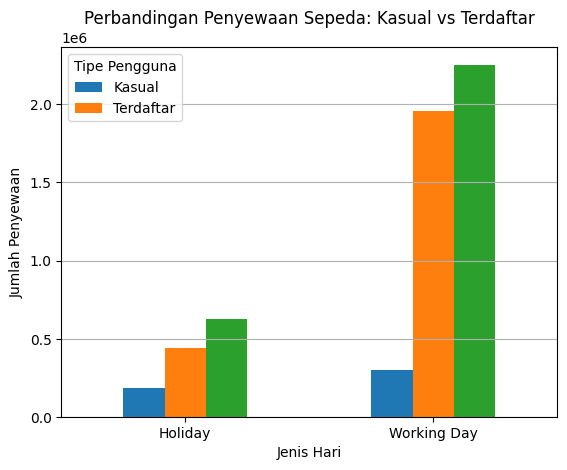

In [25]:
# Menentukan hari kerja dan hari libur
# 'workingday' 0: hari libur, 1: hari kerja
df_day['day_type'] = df_day['workingday'].map({0: 'Holiday', 1: 'Working Day'})

# Menghitung total penyewaan untuk kasual dan terdaftar berdasarkan jenis hari
usage_by_day_type = df_day.groupby('day_type').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count_cr': 'sum'  # Total penyewaan
}).reset_index()

# Visualisasi total penyewaan berdasarkan jenis hari
plt.figure(figsize=(10, 5))
usage_by_day_type.set_index('day_type').plot(kind='bar', stacked=False)
plt.title('Perbandingan Penyewaan Sepeda: Kasual vs Terdaftar')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna', labels=['Kasual', 'Terdaftar'])
plt.grid(axis='y')
plt.show()

Penyewaan pada Hari Kerja:

- Pada hari kerja, terlihat bahwa penyewaan sepeda oleh pengguna terdaftar (dalam warna oranye) jauh lebih tinggi dibandingkan dengan penyewaan oleh pengguna kasual (dalam warna biru). Ini menunjukkan bahwa banyak pengguna terdaftar yang bersepeda untuk keperluan kerja atau aktivitas rutin mereka pada hari kerja.

Penyewaan pada Hari Libur:

- Pada hari libur, jumlah penyewaan oleh pengguna kasual tampak lebih tinggi dibandingkan dengan pengguna terdaftar. Hal ini menunjukkan bahwa pengguna kasual mungkin lebih cenderung untuk menyewa sepeda pada hari libur, kemungkinan untuk rekreasi atau aktivitas santai.

Perbandingan Total Penyewaan:

- Secara keseluruhan, jumlah penyewaan pada hari kerja jauh lebih tinggi dibandingkan pada hari libur. Ini mungkin disebabkan oleh banyaknya pengguna terdaftar yang menggunakan sepeda sebagai sarana transportasi sehari-hari.
Di sisi lain, jumlah penyewaan pada hari libur meskipun lebih sedikit, menunjukkan partisipasi aktif dari pengguna kasual yang ingin menikmati waktu luang mereka dengan bersepeda.

Kesimpulan Umum:

- Grafik ini menunjukkan perbedaan perilaku antara pengguna kasual dan terdaftar dalam konteks penyewaan sepeda. Pengguna terdaftar cenderung lebih aktif pada hari kerja, sedangkan pengguna kasual lebih aktif pada hari libur. Ini dapat menjadi pertimbangan penting untuk strategi pemasaran dan promosi, seperti menawarkan paket atau diskon khusus untuk pengguna kasual pada akhir pekan atau hari libur

### Pertanyaan 4:

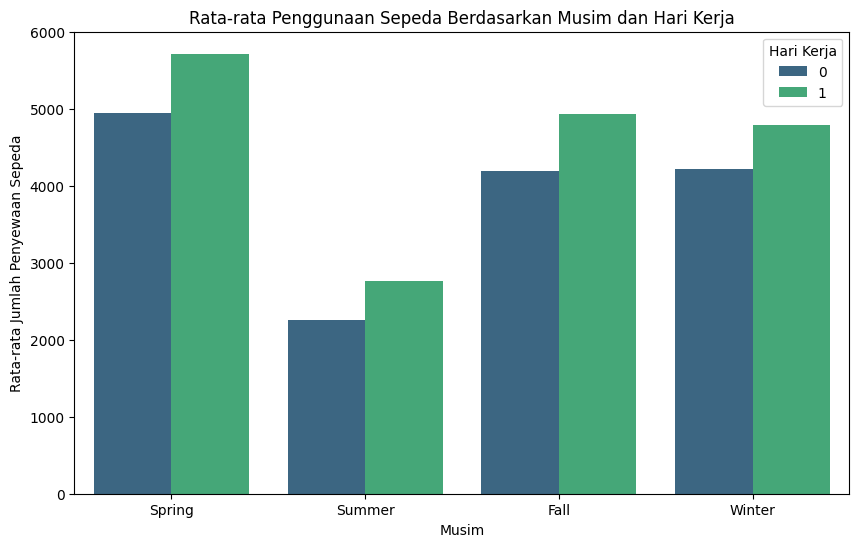

In [26]:
# Agregasi data berdasarkan musim dan hari kerja
season_workingday_usage = df_day.groupby(['season', 'workingday']).agg({'count_cr': 'mean'}).reset_index()

# Membuat visualisasi pola penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count_cr', hue='workingday', data=season_workingday_usage, palette='viridis')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim dan Hari Kerja')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Hari Kerja')
plt.show()

Penggunaan Sepeda Berdasarkan Musim:

- Spring (Musim Semi): Rata-rata penyewaan sepeda paling tinggi pada musim semi, dengan angka mendekati 6000. Ini menunjukkan bahwa musim semi mungkin merupakan waktu yang sangat populer untuk bersepeda, mungkin karena cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.
- Summer (Musim Panas): Meskipun penyewaan sepeda pada musim panas lebih rendah dibandingkan dengan musim semi, masih terdapat jumlah yang signifikan, sekitar 3000. Musim panas juga sering menjadi waktu aktif untuk bersepeda, terutama untuk aktivitas rekreasi.
- Fall (Musim Gugur): Penggunaan sepeda pada musim gugur menunjukkan angka yang mirip dengan musim panas. Ini bisa menunjukkan bahwa orang tetap aktif bersepeda meskipun cuaca mulai berubah.
- Winter (Musim Dingin): Rata-rata penyewaan pada musim dingin adalah yang terendah, tetapi ada jumlah penyewaan yang terukur. Ini mungkin mencerminkan bahwa bersepeda pada musim dingin kurang populer karena cuaca yang lebih dingin dan kurang nyaman.

Pengaruh Hari Kerja:

- Hari Kerja (1): Rata-rata penyewaan sepeda pada hari kerja menunjukkan angka yang lebih tinggi dibandingkan dengan hari libur. Ini bisa jadi karena banyak pengguna terdaftar yang menggunakan sepeda untuk pergi ke tempat kerja atau aktivitas sehari-hari.
- Hari Libur (0): Pada hari libur, meskipun penyewaan masih signifikan, terlihat ada penurunan dalam jumlah penyewaan sepeda dibandingkan dengan hari kerja, terutama pada musim semi dan musim dingin.

### Pertanyaan 5:

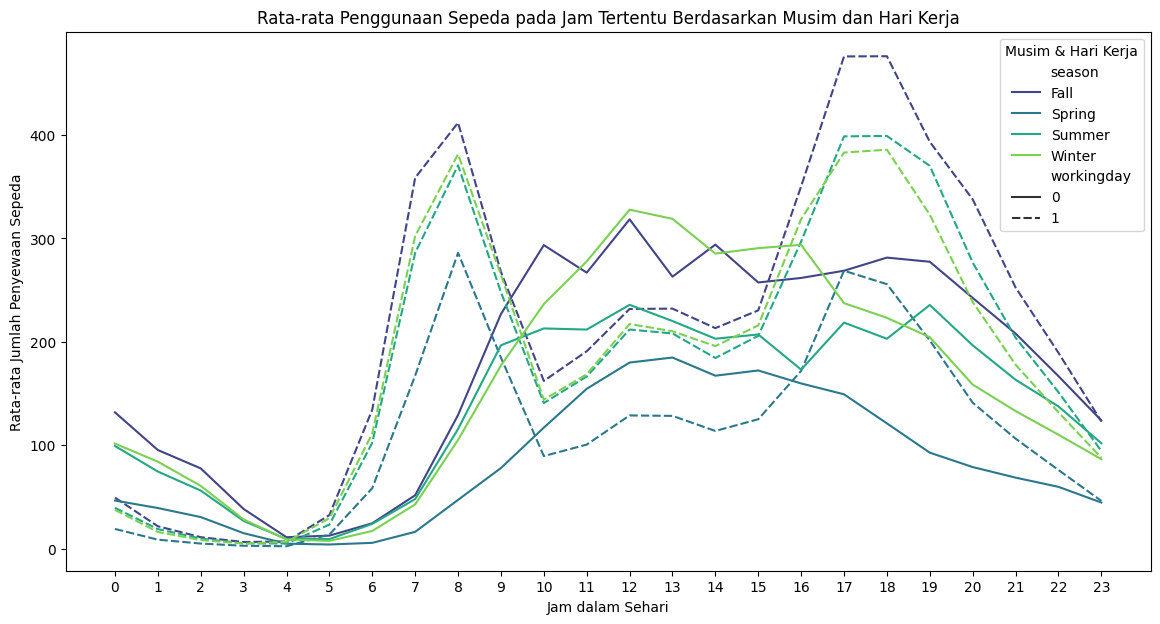

In [27]:
# Mengelompokkan penggunaan sepeda berdasarkan musim, hari kerja, dan jam
hourly_season_workingday_usage = df_hour.groupby(['season', 'workingday', 'hours']).agg({'count_cr': 'mean'}).reset_index()

# Visualisasi pola penggunaan sepeda pada jam tertentu berdasarkan musim dan hari kerja
plt.figure(figsize=(14, 7))
sns.lineplot(x='hours', y='count_cr', hue='season', style='workingday', data=hourly_season_workingday_usage, palette='viridis')
plt.title('Rata-rata Penggunaan Sepeda pada Jam Tertentu Berdasarkan Musim dan Hari Kerja')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=range(0, 24, 1))  # Menampilkan setiap jam dari 0 hingga 23
plt.legend(title='Musim & Hari Kerja', loc='upper right')
plt.show()


Pola Umum Penggunaan Sepeda:

- Ada dua puncak penggunaan sepeda yang jelas, yaitu pada pukul 8 pagi dan pukul 5 sore. Ini menunjukkan adanya hubungan dengan jam commuting (berangkat dan pulang kerja/sekolah).
Penggunaan sepeda paling rendah terjadi antara pukul 0 hingga 6 pagi, kemungkinan karena waktu ini merupakan jam tidur atau istirahat.

Pengaruh Hari Kerja dan Hari Libur:

- Pada hari kerja (digambarkan dengan garis putus-putus), ada lonjakan tajam sekitar pukul 7-8 pagi dan 5-6 sore, yang menunjukkan penggunaan sepeda untuk perjalanan ke dan dari tempat kerja atau sekolah.
Pada hari libur (garis penuh), lonjakan ini tidak terlalu tajam, tetapi penggunaan sepeda lebih merata sepanjang hari, dengan peningkatan yang sedikit lebih tinggi di siang hari.

Pengaruh Musim:

- Musim Panas (Summer): Menunjukkan penggunaan sepeda paling tinggi, terutama pada jam commuting. Hal ini mungkin karena cuaca yang lebih bersahabat untuk bersepeda.
- Musim Dingin (Winter): Memiliki penggunaan sepeda yang paling rendah, khususnya pada hari kerja. Ini bisa jadi karena kondisi cuaca yang kurang mendukung.
- Musim Semi (Spring) dan Gugur (Fall): Penggunaan sepeda berada di antara musim panas dan musim dingin, dengan pola yang cukup mirip satu sama lain.


### Pertanyaan 6:

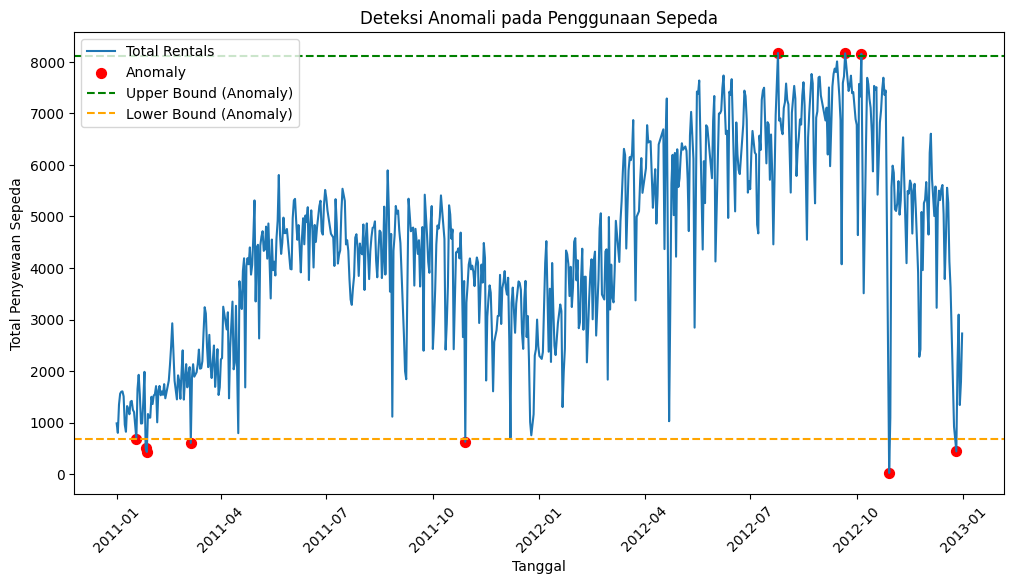

In [31]:
# Menghitung statistik rata-rata dan standar deviasi jumlah penyewaan harian
mean_cnt = df_day['count_cr'].mean()
std_cnt = df_day['count_cr'].std()

# Menentukan threshold untuk anomali (misalnya, 2 standar deviasi dari rata-rata)
upper_bound = mean_cnt + 2 * std_cnt
lower_bound = mean_cnt - 2 * std_cnt

# Menemukan hari yang masuk kategori anomali
anomaly_days = df_day[(df_day['count_cr'] > upper_bound) | (df_day['count_cr'] < lower_bound)]

# Visualisasi anomali
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['count_cr'], label='Total Rentals')
plt.scatter(anomaly_days['dteday'], anomaly_days['count_cr'], color='red', label='Anomaly', s=50)
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound (Anomaly)')
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound (Anomaly)')
plt.title('Deteksi Anomali pada Penggunaan Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Pola Umum Penyewaan:

- Jumlah penyewaan sepeda secara umum mengalami tren peningkatan dari awal 2011 hingga pertengahan 2012, dengan beberapa fluktuasi musiman.
Setelah mencapai puncaknya sekitar pertengahan hingga akhir 2012, jumlah penyewaan mulai menurun hingga akhir 2012 dan awal 2013.

Anomali Terlihat:

- Anomali ditandai dengan titik merah pada grafik, baik di atas maupun di bawah rentang batas yang ditentukan.
- Anomali Bawah (Lower Bound): Ada beberapa titik di mana jumlah penyewaan sepeda sangat rendah, yang jauh di bawah batas anomali (garis oranye putus-putus). Ini terjadi beberapa kali di awal 2011 dan pada akhir 2012 hingga awal 2013.
Ini bisa disebabkan oleh faktor-faktor seperti cuaca ekstrem, pemeliharaan infrastruktur, atau kebijakan lokal yang mungkin menghambat penyewaan sepeda.
- Anomali Atas (Upper Bound): Ada beberapa titik di mana jumlah penyewaan melebihi batas atas (garis hijau putus-putus). Ini terjadi di akhir 2012, menunjukkan lonjakan tak terduga dalam penggunaan sepeda yang bisa disebabkan oleh peristiwa khusus seperti acara besar atau promosi yang meningkatkan penyewaan sepeda secara signifikan.

Puncak dan Penurunan:

- Puncak jumlah penyewaan terjadi pada pertengahan 2012, namun setelah itu terjadi penurunan yang konsisten menuju akhir 2012 dan awal 2013. Ini bisa mencerminkan perubahan musiman, dengan musim dingin atau faktor lain yang mempengaruhi minat pengguna sepeda.

Batas Anomali:

- Garis hijau putus-putus menunjukkan batas atas anomali, di mana penyewaan sepeda yang melebihi jumlah ini dianggap sebagai anomali positif.
Garis oranye putus-putus menunjukkan batas bawah anomali, di mana penyewaan sepeda yang jauh lebih rendah dari garis ini dianggap sebagai anomali negatif.

### Pertanyaan 7:

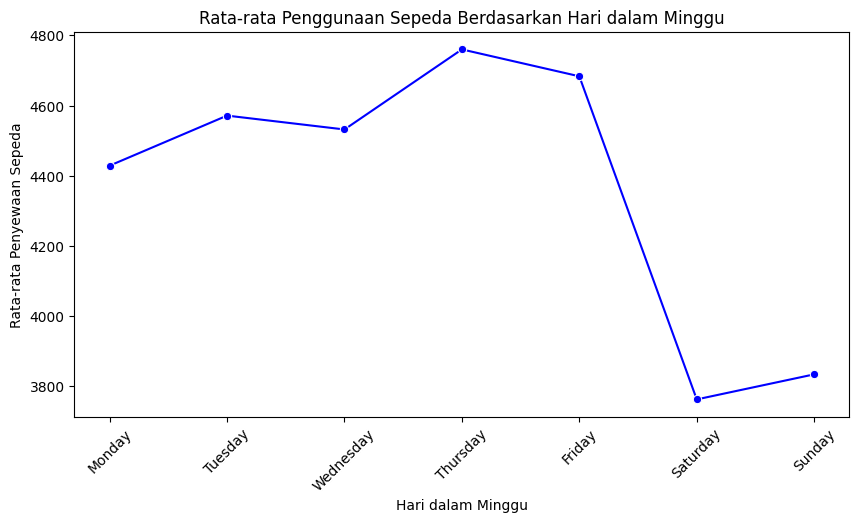

In [28]:
# Menambahkan kolom hari dalam minggu untuk analisis
df_day['weekdays'] = pd.to_datetime(df_day['dteday']).dt.day_name()

# Mengelompokkan data berdasarkan hari dalam minggu
weekly_trend = df_day.groupby('weekdays').agg({'count_cr': 'mean'}).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Visualisasi tren mingguan
plt.figure(figsize=(10, 5))
sns.lineplot(x='weekdays', y='count_cr', data=weekly_trend, marker='o', linestyle='-', color='blue')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()


Polanya:

- Hari Senin hingga Kamis: Terdapat peningkatan bertahap dalam rata-rata penyewaan sepeda dari Senin hingga Kamis. Puncak tertinggi terjadi pada hari Kamis, dengan rata-rata sekitar 4800 penyewaan.
Hari Jumat: Setelah puncak di hari Kamis, terjadi sedikit penurunan penggunaan sepeda pada hari Jumat, meskipun jumlahnya masih cukup tinggi dibandingkan dengan awal minggu.
- Akhir Pekan (Sabtu & Minggu): Penggunaan sepeda menurun secara drastis pada hari Sabtu, dengan jumlah penyewaan mendekati 3800. Pada hari Minggu, penggunaan sepeda sedikit meningkat tetapi masih berada pada tingkat yang lebih rendah dibandingkan hari-hari kerja.

Insight Utama:

- Hari Kerja vs Akhir Pekan: Penggunaan sepeda lebih tinggi selama hari kerja (Senin hingga Jumat), dengan puncaknya pada hari Kamis. Sebaliknya, penggunaan sepeda turun drastis pada akhir pekan, terutama pada hari Sabtu yang mencatatkan jumlah penyewaan terendah.
- Faktor-faktor: Penurunan tajam pada hari Sabtu dan Minggu bisa disebabkan oleh beberapa faktor, seperti berkurangnya aktivitas rutin (seperti perjalanan ke kantor atau sekolah), atau kebiasaan pengguna yang lebih memilih menggunakan sepeda di hari kerja.

### Pertanyaan 8:

<ipython-input-29-2ba243fba4c1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='count_cr', data=time_of_day_usage, palette='coolwarm')


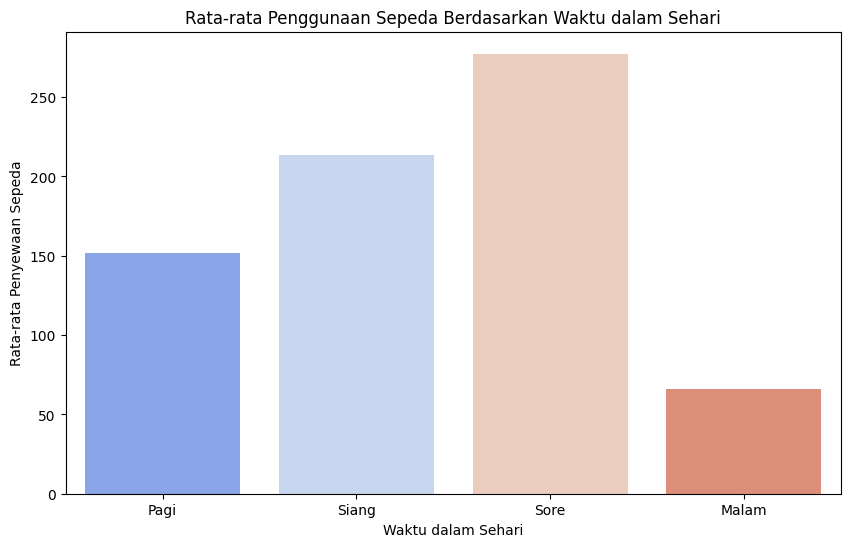

In [29]:
# Menambahkan kolom yang merepresentasikan waktu dalam sehari (misalnya: pagi, siang, sore, malam)
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

df_hour['time_of_day'] = df_hour['hours'].apply(time_of_day)

# Mengelompokkan data berdasarkan waktu dalam sehari
time_of_day_usage = df_hour.groupby('time_of_day').agg({'count_cr': 'mean'}).reindex(['Pagi', 'Siang', 'Sore', 'Malam']).reset_index()

# Visualisasi tren penggunaan sepeda berdasarkan waktu dalam sehari
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='count_cr', data=time_of_day_usage, palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


Polanya:

- Penggunaan Sore Hari: Waktu penggunaan sepeda paling tinggi adalah di sore hari, dengan rata-rata penyewaan mencapai lebih dari 250 penyewaan. Ini menunjukkan bahwa banyak pengguna lebih cenderung menggunakan sepeda pada waktu sore, mungkin untuk pulang kerja atau aktivitas rekreasi.
- Penggunaan Siang Hari: Setelah sore, siang hari mencatat rata-rata penyewaan yang cukup tinggi, di atas 200 penyewaan. Penggunaan sepeda di siang hari mungkin terkait dengan jam makan siang atau kegiatan siang lainnya.
- Penggunaan Pagi Hari: Penggunaan di pagi hari lebih rendah dibandingkan siang dan sore, tetapi masih terbilang signifikan, dengan rata-rata sekitar 150 penyewaan. Ini kemungkinan besar terkait dengan aktivitas pagi seperti pergi ke tempat kerja atau sekolah.
- Penggunaan Malam Hari: Penggunaan sepeda paling sedikit terjadi pada malam hari, dengan rata-rata di bawah 100 penyewaan. Ini menunjukkan bahwa pengguna cenderung menghindari bersepeda pada malam hari, mungkin karena faktor kenyamanan atau keamanan.

Insight Utama:

- Sore sebagai Waktu Puncak: Waktu sore adalah puncak penggunaan sepeda, mungkin karena saat itu banyak orang yang pulang kerja atau terlibat dalam aktivitas santai.
- Penurunan di Malam Hari: Penggunaan sepeda menurun tajam di malam hari, yang mengindikasikan bahwa pengguna lebih sedikit yang menyewa sepeda pada saat gelap atau setelah aktivitas sehari-hari selesai.

## Conclusion

Kesimpulan Pertanyaan

- Conclution pertanyaan 1: Pengguna Terdaftar adalah kelompok utama yang menggunakan layanan penyewaan sepeda, baik dari sisi frekuensi maupun total kontribusi penyewaan. Pengguna Kasual menggunakan layanan lebih sedikit dibandingkan pengguna terdaftar, meskipun mereka tetap aktif berdasarkan nilai recency yang sama.

- Conclution pertanyaan 2: Musim semi adalah waktu paling populer untuk bersepeda, dengan cuaca cerah sangat memengaruhi keputusan orang untuk menyewa sepeda. Musim lainnya, terutama musim dingin, memiliki jumlah penyewaan yang jauh lebih sedikit, menunjukkan bahwa cuaca dan kondisi musim sangat memengaruhi kebiasaan bersepeda masyarakat.

- Conclution pertanyaan 3: Pengguna terdaftar cenderung lebih aktif pada hari kerja, sedangkan pengguna kasual lebih aktif pada hari libur. Ini dapat menjadi pertimbangan penting untuk strategi pemasaran dan promosi, seperti menawarkan paket atau diskon khusus untuk pengguna kasual pada akhir pekan atau hari libur

- Conclution pertanyaan 4: Rata-rata penggunaan sepeda bervariasi tergantung pada musim dan jenis hari. Musim semi adalah waktu paling aktif untuk penyewaan sepeda, sementara musim dingin cenderung menjadi waktu dengan penyewaan terendah.
Terdapat perbedaan yang jelas antara penggunaan sepeda pada hari kerja dan hari libur, dengan hari kerja menunjukkan angka yang lebih tinggi.

- Conclution pertanyaan 5: Cuaca (musim) dan status hari kerja sangat mempengaruhi pola penggunaan sepeda. Penggunaan sepeda meningkat pada jam commuting di hari kerja dan menurun di musim dingin. Di hari libur, meskipun tidak ada lonjakan signifikan di pagi atau sore hari, penggunaan sepeda lebih stabil sepanjang hari.-

- Conclution pertanyaan 6: Pola penyewaan sepeda menunjukkan tren peningkatan dari awal 2011 hingga pertengahan 2012, diikuti oleh penurunan pada akhir 2012 hingga awal 2013. Anomali terdeteksi pada beberapa titik, baik sebagai penurunan signifikan (anomali bawah) maupun lonjakan tak terduga (anomali atas), yang kemungkinan disebabkan oleh faktor eksternal seperti cuaca, pemeliharaan, kebijakan lokal, atau acara khusus. Puncak penggunaan terjadi pada pertengahan 2012 sebelum tren mulai menurun, menunjukkan potensi faktor musiman yang memengaruhi penggunaan sepeda. Batas anomali memberikan panduan dalam mengidentifikasi penyewaan yang tidak biasa, baik terlalu tinggi maupun terlalu rendah.

- Conclution pertanyaan 7: Penggunaan sepeda paling optimal selama hari kerja, terutama menjelang akhir minggu. Ini bisa menjadi indikasi bahwa layanan penyewaan sepeda lebih banyak digunakan untuk kegiatan sehari-hari seperti pergi bekerja atau beraktivitas di kota, sementara pada akhir pekan, pengguna lebih jarang memanfaatkan layanan ini.

- Conclution pertanyaan 8: Waktu terbaik untuk layanan penyewaan sepeda adalah pada sore dan siang hari, dengan potensi penawaran promosi atau peningkatan layanan pada pagi hari. Di sisi lain, layanan pada malam hari mungkin bisa ditingkatkan jika ada kebutuhan khusus seperti acara malam atau peningkatan keamanan.

## Analisis Lanjutan (Opsional)

Apa yang dimaksud dengan teknik binning, dan bagaimana teknik ini digunakan untuk mengelompokkan data jumlah sewa sepeda ke dalam kategori tertentu?

In [30]:
# Teknik binning untuk mengelompokkan suhu ke dalam kategori
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Sangat Dingin', 'Dingin', 'Normal', 'Hangat', 'Panas']
df_day['temp_category'] = pd.cut(df_day['temp'], bins=bins, labels=labels)

# Menghitung jumlah sewa berdasarkan kategori suhu
temp_counts = df_day.groupby('temp_category')['count_cr'].sum().reset_index()

# Tampilkan hasil
print("Jumlah Sewa berdasarkan Kategori Suhu:\n", temp_counts)


Jumlah Sewa berdasarkan Kategori Suhu:
    temp_category  count_cr
0  Sangat Dingin     47643
1         Dingin    690132
2         Normal    912317
3         Hangat   1154194
4          Panas     76245


<ipython-input-30-b333a0b5a52d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_counts = df_day.groupby('temp_category')['count_cr'].sum().reset_index()
